![EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg](attachment:EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg)

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing 

In [1]:
#  Cargar librerías
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import TimeSeriesSplit


In [2]:
#Cargar datos
df = pd.read_csv("Smarket.csv", sep=",")
df

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,Up
...,...,...,...,...,...,...,...,...,...
1245,1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,Up
1246,1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,Down
1247,1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,Up
1248,1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,Down


In [3]:
# Se eliminar filas con valores faltantes en caso de haber y la variable que indific acantidad de registros (Unnamed: 0)
df = df.dropna(subset=['Direction']).reset_index(drop=True)
df = df.sort_values(by='Year')

yTotal = df['Direction'].astype(str).str.strip().str.title().to_numpy()  # 'Up'/'Down'
XTotal = df.drop(columns=['Direction', 'Unnamed: 0'], errors='ignore').to_numpy()

In [4]:
split = int(len(df)*0.67)

XTrain = XTotal[:split]
XTest = XTotal[split:]

yTrain = yTotal[:split]
yTest = yTotal[split:]

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

#### Plan de EDA para el dataframe `eda`

**Variables:** `Year`, `Lag1`, `Lag2`, `Lag3`, `Lag4`, `Lag5`, `Volume`, `Direction` (variable respuesta).

| # | Paso | Qué hacer | Objetivo |
|---|------|-----------|----------|
| 1 | **Forma y tipos** | `eda.shape`, `eda.info()`, `eda.dtypes` | Ver tamaño, nulos y tipos de cada columna. |
| 2 | **Estadísticas descriptivas** | `eda.describe(include='all')` o `eda.describe()` para numéricas | Medias, dispersión, cuantiles y conteos por categoría. |
| 3 | **Variable respuesta (Direction)** | `value_counts`, countplot o barplot de `Direction` | Balance de clases (Up vs Down) y posible desbalance. |
| 4 | **Distribución por año** | Countplot de `Year` | Comprobar si hay años con muchos o pocos registros. |
| 5 | **Histogramas de predictores** | Histogramas o KDE de `Lag1`–`Lag5` y `Volume` | Forma de la distribución, asimetría y posibles outliers. |
| 6 | **Correlograma** | Matriz de correlación (`eda[cols_num].corr()`) + heatmap con `sns.heatmap()` | Correlación entre predictores numéricos (multicolinealidad). |
| 7 | **Relación predictores vs respuesta** | Boxplots o violín de cada Lag/Volume por `Direction` | Ver si las variables discriminan entre Up y Down. |
| 8 | **Valores faltantes** | `eda.isnull().sum()` o `eda.isna().sum()` | Confirmar ausencia de nulos tras el preprocesado. |
| 9 | **Duplicados** | `eda.duplicated().sum()` | Comprobar si hay filas duplicadas. |
| 10 | **Conclusiones** | Redactar en la celda de análisis del punto 1 | Resumir hallazgos, balance de clases, correlaciones relevantes y recomendaciones para el modelado. |

In [5]:
eda = df.copy()

In [6]:
eda = eda.drop(columns=['Unnamed: 0'])


In [7]:
eda.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction'], dtype='str')

In [8]:
eda.info()

<class 'pandas.DataFrame'>
Index: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Direction  1250 non-null   str    
dtypes: float64(6), int64(1), str(1)
memory usage: 91.7 KB


In [9]:
eda.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470


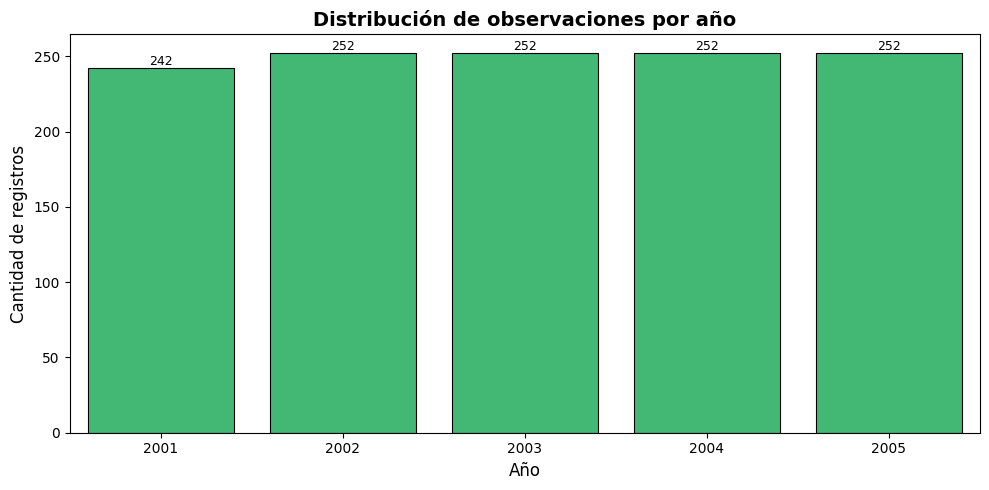

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Year", data=eda, color="#2ecc71", edgecolor="black", linewidth=0.8)
ax.set_title("Distribución de observaciones por año", fontsize=14, fontweight="bold")
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad de registros", fontsize=12)
ax.tick_params(axis="both", labelsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

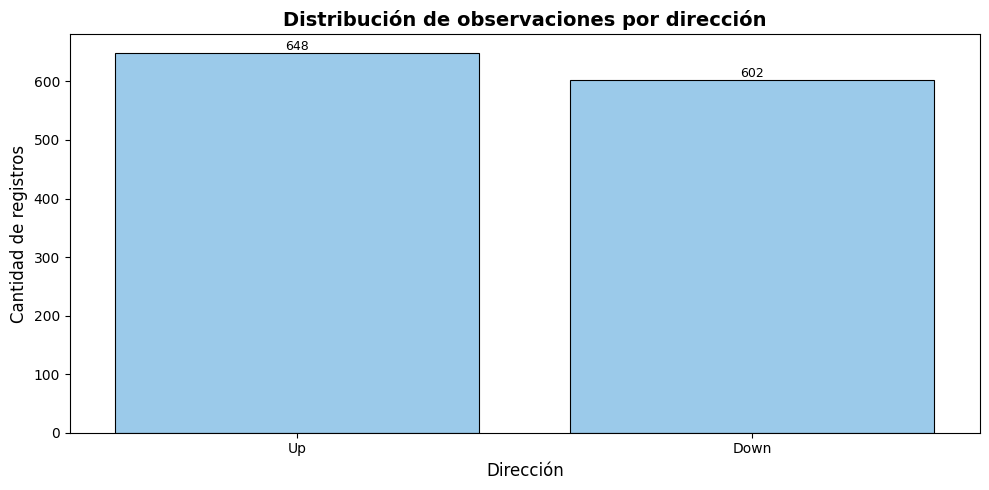

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="Direction", data=eda, color="#8ECDF7", edgecolor="black", linewidth=0.8)
ax.set_title("Distribución de observaciones por dirección", fontsize=14, fontweight="bold")
ax.set_xlabel("Dirección", fontsize=12)
ax.set_ylabel("Cantidad de registros", fontsize=12)
ax.tick_params(axis="both", labelsize=10)
for container in ax.containers:
    ax.bar_label(container, fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19032\781069092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda_lags, x='Lag', y='Valor', palette='viridis')


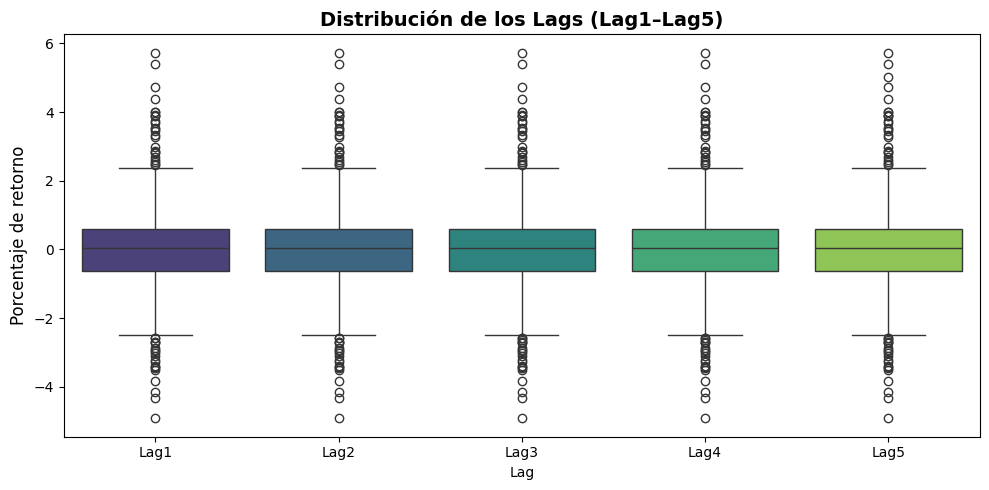

In [12]:
# Boxplot múltiple: Lag1 a Lag5
lags = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']
eda_lags = eda[lags].melt(var_name='Lag', value_name='Valor')

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=eda_lags, x='Lag', y='Valor', palette='viridis')
ax.set_title('Distribución de los Lags (Lag1–Lag5)', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje de retorno', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

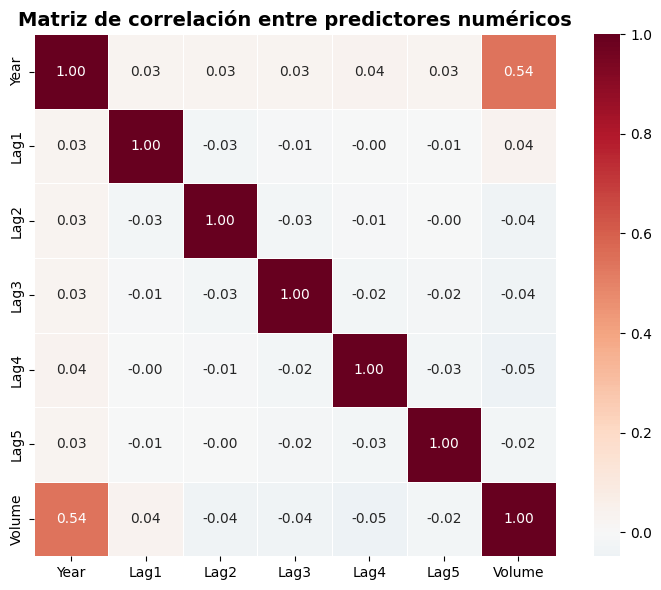

In [13]:
# Correlograma: matriz de correlación + heatmap (multicolinealidad)
cols_num = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
corr_mat = eda[cols_num].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Matriz de correlación entre predictores numéricos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19032\154033219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=eda, x='Direction', y=var, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
C:\Users\user\AppData\Local\Temp\ipykernel_19032\154033219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=eda, x='Direction', y=var, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
C:\Users\user\AppData\Local\Temp\ipykernel_19032\154033219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=eda, x='Direction', y=var, ax=axes[i], palette=[

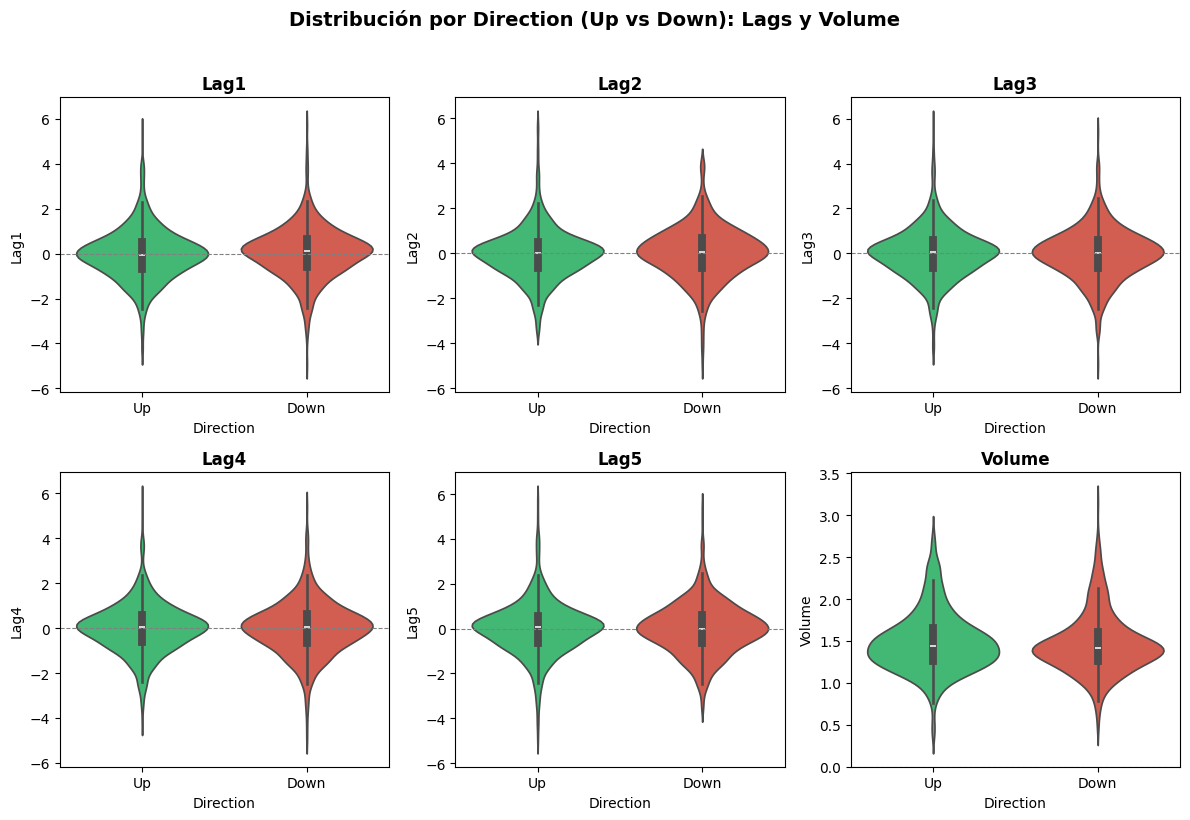

In [14]:
# Gráficos de violín: Lag1–Lag5 y Volume por Direction (discriminación Up vs Down)
vars_plot = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
n_vars = len(vars_plot)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(vars_plot):
    sns.violinplot(data=eda, x='Direction', y=var, ax=axes[i], palette=['#2ecc71', '#e74c3c'])
    axes[i].set_title(var, fontweight='bold')
    axes[i].set_xlabel('Direction')
    axes[i].set_ylabel(var)
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.suptitle('Distribución por Direction (Up vs Down): Lags y Volume', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Análisis y conclusiones del EDA (punto 1)

**Procedimiento realizado:** Se llevó a cabo un análisis exploratorio sobre el set (Smarket): revisión de forma y tipos, estadísticas descriptivas, distribución de la variable respuesta (Direction) y del año (Year), boxplots de los Lags, matriz de correlación con heatmap y gráficos de violín de Lag1–Lag5 y Volume por Direction.

**Hallazgos principales:**

1. **Datos y variable respuesta:** El conjunto tiene 1250 observaciones sin nulos en las columnas usadas. La variable **Direction** (Up/Down) está relativamente equilibrada; un ligero desbalance no invalida el uso de los modelos de clasificación considerados.

2. **Distribución temporal:** Las observaciones están repartidas por años (p. ej. 2001–2005). La distribución por **Year** es razonablemente uniforme, lo que evita sesgos temporales marcados en train/test si la partición es aleatoria.

3. **Predictores numéricos (Lags y Volume):** Los **Lags** (retornos pasados) presentan distribuciones aproximadamente simétricas alrededor de cero, con presencia de outliers en las colas. **Volume** tiene una escala distinta y una forma distinta al resto; podría ser útil estandarizar o tenerla en cuenta de forma específica en el modelado.

4. **Correlación y multicolinealidad:** El heatmap muestra correlaciones fuertes entre **Volume** y **Year** (aumento de volumen en el tiempo) y correlaciones moderadas entre **Lags** consecutivos (Lag1–Lag5). Esto sugiere posible multicolinealidad entre Lags y entre Volume y Year; en modelos sensibles (p. ej. regresión logística) podría valorarse selección de variables, regularización o reducción de dimensionalidad.

5. **Discriminación Up vs Down:** Los **gráficos de violín** por Direction indican que las distribuciones de los Lags y de Volume son muy parecidas entre Up y Down: solapamiento alto y medias/medianas cercanas. Por tanto, el poder discriminante de cada predictor por sí solo es **limitado**, lo que es coherente con la dificultad que suelen mostrar estos datos para predecir la dirección del mercado.

**Conclusión y recomendación para el modelado:** Los predictores considerados (Year, Lag1–Lag5, Volume) aportan información limitada para distinguir Up de Down a nivel univariado, y existe correlación entre ellos. Es esperable que los modelos lineales (LDA, regresión logística, etc.) tengan un desempeño moderado; conviene evaluar bien las métricas (accuracy, AUC, precisión) y, si se busca mejorar, explorar otras variables o transformaciones además de la posible regularización o selección de características.

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [15]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

# sin validacion cruzada
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)


prediccionesLDA=clfLDA.predict(XTest)
prediccionesProbLDA=clfLDA.predict_proba(XTest)


errorLDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesLDA[i]):
        errorLDA+=1/len(yTest)
        
accuracyLDA=accuracy_score(y_true=yTest, y_pred=prediccionesLDA)

precisionLDA = precision_score(y_true=yTest, y_pred=prediccionesLDA, pos_label='Up')

fpr, tpr, thresholds = metrics.roc_curve(yTest,prediccionesProbLDA[:,1],pos_label='Up')
AUC_LDA=metrics.auc(fpr, tpr)

print(f"Accuracy: {np.mean(accuracyLDA):.3f}")
print(f"Precision(Up): {np.mean(precisionLDA):.3f}")
print(f"AUC(Up): {np.nanmean(AUC_LDA):.3f}")


Accuracy: 0.554
Precision(Up): 0.554
AUC(Up): 0.502


In [16]:

# Con validacion cruzada
folds = 10
kf = TimeSeriesSplit(n_splits=folds)

accuracyLDA_CV = []
precisionLDA_CV = []
aucLDA_CV = []

for train_index, test_index in kf.split(XTotal, yTotal):

    X_trainCV, X_testCV = XTotal[train_index], XTotal[test_index]
    y_trainCV, y_testCV = yTotal[train_index], yTotal[test_index]

    modelo = LinearDiscriminantAnalysis()
    modelo.fit(X_trainCV, y_trainCV)

    pred = modelo.predict(X_testCV)
    proba = modelo.predict_proba(X_testCV)

    # Accuracy
    accuracyLDA_CV.append(accuracy_score(y_testCV, pred))
    # Precision clase Up
    precisionLDA_CV.append(precision_score(y_testCV, pred, pos_label='Up', zero_division=0))

    # AUC 
    aucLDA_CV.append(roc_auc_score((y_testCV == 'Up').astype(int), proba[:, 1]))


print(f"Accuracy promedio: {np.mean(accuracyLDA_CV):.3f}")
print(f"Precision(Up) promedio: {np.mean(precisionLDA_CV):.3f}")
print(f"AUC(Up) promedio: {np.nanmean(aucLDA_CV):.3f}")


Accuracy promedio: 0.528
Precision(Up) promedio: 0.423
AUC(Up) promedio: 0.493


#### Análisis y Conclusión punto 2

Para este procedimiento inicialmente se entrenó el modelo usando XTrain y yTrain en la función LinearDiscriminantAnalysis correspondiente a LDA. Posteriormente se realizaron las predicciones, obteniendo tanto la clase predicha como la probabilidad para cada observación. Finalmente, se calcularon las métricas de accuracy, precision y AUC, asumiendo que la clase positiva es 'Up'. Adicionalmente, se evaluó el modelo bajo dos enfoques: primero utilizando una única partición train-test (sin validación cruzada) con 33% de los datos en test, y luego implementando un esquema de cross-validation con 10 pliegues respetando la temporalidad de los datos, con el fin de comparar la estabilidad y consistencia del desempeño del modelo en diferentes subconjuntos de datos. Este enfoque permite obtener una evaluación más realista en problemas de series temporales, ya que evita mezclar información futura dentro del entrenamiento.

Al comparar estos resultados con los obtenidos mediante validación cruzada (cross-validation), se observa que las métricas promedio empeoraron ligeramente, alcanzando una accuracy de 0.528, una precision de 0.423 y un AUC de 0.493. Sin embargo, en ambos casos las métricas se mantienen cercanas al 50%, lo que sugiere que, independientemente del enfoque de validación utilizado, el modelo continúa presentando una capacidad predictiva limitada.

En principio, este modelo no sería recomendable para utilizarse en la predicción de precios, ya que podría generar decisiones de inversión poco confiables debido a su bajo desempeño predictivo. Asimismo, el ligero deterioro en el desempeño del modelo puede deberse a la naturaleza temporal de los datos; al tratarse de una serie temporal, la forma en que se realizan las divisiones del conjunto de datos puede afectar los resultados. Incluso intentando respetar la temporalidad mediante el uso de splits adecuados, es posible que existan cambios estructurales entre años o periodos que dificulten la capacidad del modelo para generalizar correctamente.

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [17]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

# sin validacion cruzada
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)


prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)


errorQDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)

precisionQDA = precision_score(y_true=yTest, y_pred=prediccionesQDA, pos_label='Up')

fpr, tpr, thresholds = metrics.roc_curve(yTest,prediccionesProbQDA[:,1],pos_label='Up')
AUC_QDA=metrics.auc(fpr, tpr)

print(f"Accuracy: {np.mean(accuracyQDA):.3f}")
print(f"Precision(Up): {np.mean(precisionQDA):.3f}")
print(f"AUC(Up): {np.nanmean(AUC_QDA):.3f}")


Accuracy: 0.516
Precision(Up): 0.549
AUC(Up): 0.486


In [18]:

folds = 10
kf = TimeSeriesSplit(n_splits=folds)

accuracyQDA_CV= []
precisionQDA_CV= []
aucQDA_CV = []

for train_index, test_index in kf.split(XTotal):
    X_trainCV, X_testCV = XTotal[train_index], XTotal[test_index]
    y_trainCV, y_testCV = yTotal[train_index], yTotal[test_index]

    modelo = QuadraticDiscriminantAnalysis()  
    modelo.fit(X_trainCV, y_trainCV)

    pred = modelo.predict(X_testCV)
    proba = modelo.predict_proba(X_testCV)

    accuracyQDA_CV.append(accuracy_score(y_testCV, pred))
    precisionQDA_CV.append(precision_score(y_testCV, pred, pos_label='Up', zero_division=0))
    
    # AUC: solo si el fold tiene ambas clases y proba no tiene NaN
    if len(np.unique(y_testCV)) == 2 and 'Up' in modelo.classes_:
        idx_up = list(modelo.classes_).index('Up')
        proba_up = proba[:, idx_up]
        if np.isnan(proba_up).any():
            aucQDA_CV.append(np.nan)
        else:
            aucQDA_CV.append(roc_auc_score((y_testCV == 'Up').astype(int), proba_up))
    else:
        aucQDA_CV.append(np.nan)

print(f"Accuracy promedio: {np.mean(accuracyQDA_CV):.3f}")
print(f"Precision(Up) promedio: {np.mean(precisionQDA_CV):.3f}")
print(f"AUC(Up) promedio: {np.nanmean(aucQDA_CV):.3f}")


Accuracy promedio: 0.527
Precision(Up) promedio: 0.435
AUC(Up) promedio: 0.491


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S *

#### Análisis y Conclusión punto 3

Para este procedimiento inicialmente se entrenó el modelo usando XTrain y yTrain en la función QuadraticDiscriminantAnalysis correspondiente a QDA. Posteriormente se realizaron las predicciones, obteniendo tanto la clase predicha como la probabilidad para cada observación. Finalmente, se calcularon las métricas de accuracy, precision y AUC, asumiendo que la clase positiva es 'Up'. Adicionalmente, se evaluó el modelo bajo dos enfoques: primero utilizando una única partición train-test (sin validación cruzada) con 33% de los datos en test, y luego implementando un esquema de cross-validation con 10 pliegues respetando la temporalidad de los datos, con el fin de comparar la estabilidad y consistencia del desempeño del modelo en diferentes subconjuntos de datos. Este enfoque permite obtener una evaluación más realista en problemas de series temporales, ya que evita mezclar información futura dentro del entrenamiento.

Para este modelo se obtuvo un accuracy de 0.516, una precision (Up) de 0.549 y un AUC de 0.486 en el enfoque train-test (respetando temporalidad mediante ordenamiento por año y división cronológica). Por su parte, bajo validación cruzada temporal, se alcanzó un accuracy promedio de 0.527, una precision (Up) promedio de 0.435 y un AUC promedio de 0.491. Se observa que el accuracy aumenta ligeramente al promediar sobre múltiples particiones temporales, mientras que la precision disminuye y el AUC se mantiene cercano a 0.5. Esto sugiere que el desempeño del modelo no es completamente consistente a lo largo del tiempo y que una única división puede producir estimaciones más optimistas o más sensibles al periodo específico evaluado.

En particular, un accuracy cercano a 0.5 implica que, independientemente de si la clase es Up o Down, el modelo acierta aproximadamente la mitad de las veces, lo cual indica un poder predictivo limitado. Esto se complementa con la precision para Up, que al disminuir en la validación cruzada temporal refleja que, en promedio, cuando el modelo predice Up su confiabilidad es menor en distintos periodos, reduciendo su utilidad para la toma de decisiones. Finalmente, un AUC cercano a 0.5 sugiere que la capacidad del modelo para discriminar entre clases es muy baja, con un comportamiento cercano al azar.

Frente a las métricas obtenidas en LDA, se observa que ambos modelos presentan desempeños similares; sin embargo, LDA tiende a mostrar resultados ligeramente superiores y más estables, mientras que QDA evidencia mayor sensibilidad a cómo cambian los datos a lo largo del tiempo. En este sentido, si se debe elegir entre estos dos enfoques, sería preferible utilizar LDA, aunque su desempeño general continúa siendo insuficiente para una aplicación confiable en predicción de precios.

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [19]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





#### Análisis y Conclusión punto 4

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [20]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####





#### Análisis y Conclusión punto 5

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

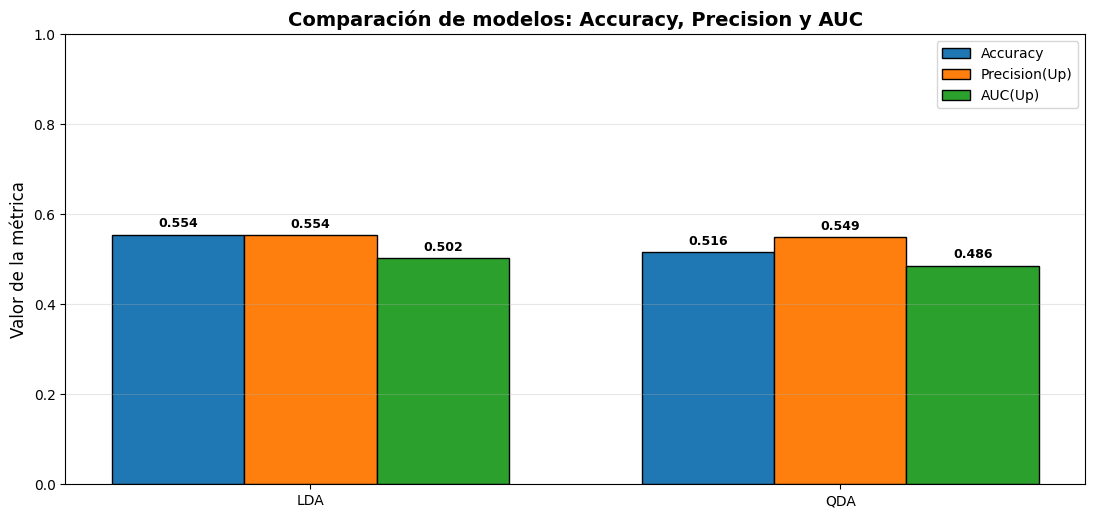

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0.1, 0.15, 0.85, 0.75])
ax.set_title("Comparación de modelos: Accuracy, Precision y AUC", fontsize=14, fontweight='bold')

modelos = ['LDA', 'QDA']

accuracy = [accuracyLDA, accuracyQDA]
precision = [precisionLDA, precisionQDA]
auc = [AUC_LDA, AUC_QDA]

x = np.arange(len(modelos))
width = 0.25


b1 = ax.bar(x - width, accuracy, width, label='Accuracy', edgecolor='black')
b2 = ax.bar(x, precision, width, label='Precision(Up)', edgecolor='black')
b3 = ax.bar(x + width, auc, width, label='AUC(Up)', edgecolor='black')

for barras in [b1, b2, b3]:
    for barra in barras:
        h = barra.get_height()
        ax.text(barra.get_x() + barra.get_width()/2, h + 0.01, f'{h:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')


ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.set_ylabel('Valor de la métrica', fontsize=12)
ax.set_ylim(0, 1)

ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.show()

#### Análisis y Conclusión punto 6